In [1]:
#load the libraries
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import re
import html5lib
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Load the data
df = pd.read_csv('data/players2.csv')

In [3]:
df.head()

,Name,Value,DOB,Season,Competition,Club ID#,PPG,Goals,Assists,Minutes,Age,Yellow Cards,Double Yellow,Red Card
0,Neymar,199.8,"Feb 5, 1992",2011,Club World Cup,2.0,1.5,1,-,180',19,-,-,-
1,Neymar,199.8,"Feb 5, 1992",2013,Champions League,10.0,2.0,4,5,775',21,1,-,-
2,Neymar,199.8,"Feb 5, 1992",2013,Copa del Rey,3.0,2.0,1,-,206',21,1,-,-
3,Neymar,199.8,"Feb 5, 1992",2013,LaLiga,26.0,2.31,9,10,1.736',21,6,-,-
4,Neymar,199.8,"Feb 5, 1992",2013,Supercopa,2.0,1.0,1,-,121',21,1,-,-


In [4]:
#for i in
df['Minutes'] = df['Minutes'].apply(lambda x: x.split("'")[0],0)

In [5]:
# Replace dashes with zeros

df['Assists'] = df['Assists'].replace('-', 0)
df['Goals'] = df['Goals'].replace('-', 0)
df['Minutes'] = df['Minutes'].replace('-', 0)
df['Yellow Cards'] = df['Yellow Cards'].str.replace('-', '0')
df['Double Yellow'] = df['Double Yellow'].str.replace('-', '0')
df['Red Card'] = df['Red Card'].str.replace('-', '0')

In [6]:
df['Yellow Cards'] = df['Yellow Cards'].str.strip()
df['Double Yellow'] = df['Double Yellow'].str.strip()
df['Red Card'] = df['Red Card'].str.strip()

In [7]:
# Covert to numeric 
df['Goals'] = pd.to_numeric(df['Goals'])
df['Assists'] = pd.to_numeric(df['Assists'])
df['Yellow Cards'] = pd.to_numeric(df['Yellow Cards'])
df['Double Yellow'] = pd.to_numeric(df['Double Yellow'])
df['Red Card'] = pd.to_numeric(df['Red Card'])

In [8]:
# Create a new column goal contribution and assign it the total number of assists and goals

df['Goal Contribution'] = np.nan
for i in range(len(df)):
    df['Goal Contribution'][i] = df['Goals'][i] + df['Assists'][i]

<ipython-input-8-8c95775155cd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Goal Contribution'][i] = df['Goals'][i] + df['Assists'][i]


In [9]:
df.head()

,Name,Value,DOB,Season,Competition,Club ID#,PPG,Goals,Assists,Minutes,Age,Yellow Cards,Double Yellow,Red Card,Goal Contribution
0,Neymar,199.8,"Feb 5, 1992",2011,Club World Cup,2.0,1.5,1,0,180,19,0,0,0,1.0
1,Neymar,199.8,"Feb 5, 1992",2013,Champions League,10.0,2.0,4,5,775,21,1,0,0,9.0
2,Neymar,199.8,"Feb 5, 1992",2013,Copa del Rey,3.0,2.0,1,0,206,21,1,0,0,1.0
3,Neymar,199.8,"Feb 5, 1992",2013,LaLiga,26.0,2.31,9,10,1.736,21,6,0,0,19.0
4,Neymar,199.8,"Feb 5, 1992",2013,Supercopa,2.0,1.0,1,0,121,21,1,0,0,1.0


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917 entries, 0 to 2916
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               2917 non-null   object 
 1   Value              2917 non-null   float64
 2   DOB                2917 non-null   object 
 3   Season             2917 non-null   int64  
 4   Competition        2917 non-null   object 
 5   Club ID#           2917 non-null   object 
 6   PPG                2917 non-null   object 
 7   Goals              2917 non-null   int64  
 8   Assists            2917 non-null   int64  
 9   Minutes            2917 non-null   object 
 10  Age                2917 non-null   int64  
 11  Yellow Cards       2917 non-null   int64  
 12  Double Yellow      2917 non-null   int64  
 13  Red Card           2917 non-null   int64  
 14  Goal Contribution  2917 non-null   float64
dtypes: float64(2), int64(7), object(6)
memory usage: 342.0+ KB


In [11]:
df.isna().sum()

Name                 0
Value                0
DOB                  0
Season               0
Competition          0
Club ID#             0
PPG                  0
Goals                0
Assists              0
Minutes              0
Age                  0
Yellow Cards         0
Double Yellow        0
Red Card             0
Goal Contribution    0
dtype: int64

In [12]:
print(df.nunique())

Name                  192
Value                  95
DOB                   189
Season                 31
Competition           165
Club ID#               89
PPG                   223
Goals                  36
Assists                19
Minutes              1281
Age                     5
Yellow Cards           15
Double Yellow           4
Red Card                3
Goal Contribution      44
dtype: int64


In [13]:
df['Competition'].unique()

array(['Club World Cup', 'Champions League', 'Copa del Rey', 'LaLiga',
       'Supercopa', 'Libertadores', 'Série A', 'Recopa Sudamericana',
       'Coupe de France', 'Coupe de la Ligue', 'Ligue 1',
       'Trophée des Champions', 'Bundesliga', 'DFB-Pokal', 'DFL-Supercup',
       'Allianz Cup', 'Champions League Qualifying', 'Europa League',
       'Liga NOS', 'Taça de Portugal Placard', 'FA Cup', 'League Cup',
       'Premier League', 'Community Shield', 'Europa League Qualifying',
       'UEFA Super Cup', 'UEFA Cup', 'Torneo Inicial', 'EFL Cup',
       'Eredivisie', 'Play-Offs Europa League', 'TOTO KNVB beker',
       'Johan Cruijff Schaal', 'Ligue 2', 'Championnat National',
       'Beker van Belgie', 'JPL Playoff II', 'Jupiler Pro League',
       'Jupiler Pro League playoff Europa League', 'Serie A',
       'Amstel Cup', 'KPN Eredivisie', 'Championship', 'U21 PL',
       'Liga BBVA', 'LaLiga2', '2ª B - Grupo I', 'Promoción LaLiga2',
       'Coppa Italia', 'Supercoppa Italiana', 'Li

In [14]:
a = df['Competition'].value_counts()
a.head(40)

Champions League               281
Premier League                 166
FA Cup                         143
Serie A                        139
Europa League                  129
Coppa Italia                   120
LaLiga                         116
Ligue 1                        111
Champions League Qualifying    105
Coupe de la Ligue               99
Copa del Rey                    97
Coupe de France                 97
League Cup                      93
UEFA Cup                        83
Bundesliga                      66
DFB-Pokal                       56
EFL Cup                         56
Europa League Qualifying        44
Eredivisie                      41
Liga NOS                        38
Libertadores                    29
Taça de Portugal Placard        27
Premier Liga                    27
Ukrainian Cup                   24
Championship                    24
Allianz Cup                     23
Community Shield                21
Série A                         21
Supercopa           

In [15]:
duplicateRowsDF = df[df.duplicated()]
duplicateRowsDF

,Name,Value,DOB,Season,Competition,Club ID#,PPG,Goals,Assists,Minutes,Age,Yellow Cards,Double Yellow,Red Card,Goal Contribution


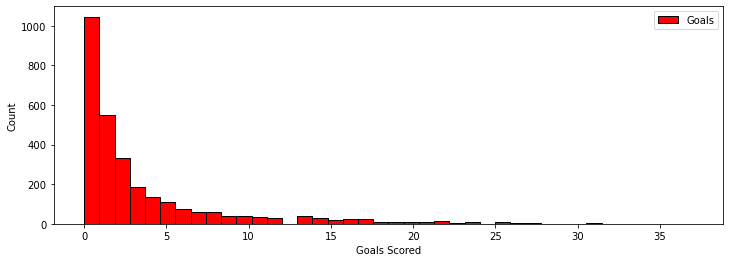

In [16]:
legend = ['Goals']
df1 = df[['Goals', 'Age']]
plt.figure(figsize=(12, 4))
plt.hist(df['Goals'], color=['red'], bins=40, ec='black')
plt.ylabel('Count')
plt.xlabel('Goals Scored')
plt.legend(legend)
plt.show()

In [17]:
df.Value.describe()

count    2917.000000
mean       36.764796
std        23.959349
min        19.080000
25%        22.500000
50%        28.800000
75%        38.250000
max       199.800000
Name: Value, dtype: float64

In [18]:
df.shape

(2917, 15)

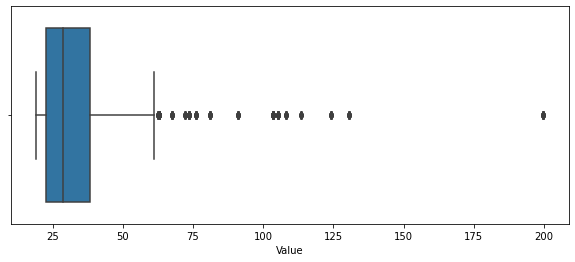

In [19]:
plt.subplots(figsize=(10,4))
sns.boxplot(x='Value', data=df)

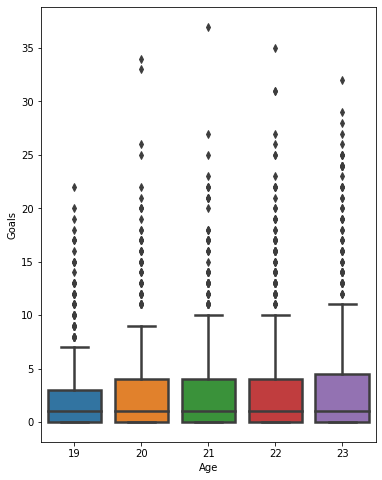

In [20]:
plt.subplots(figsize=(6,8))
sns.boxplot(x='Age', y='Goals', data= df , linewidth=2.5)

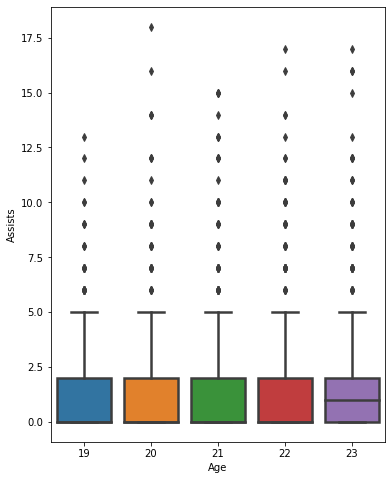

In [21]:
plt.subplots(figsize=(6,8))
sns.boxplot(x='Age', y='Assists', data= df , linewidth=2.5)

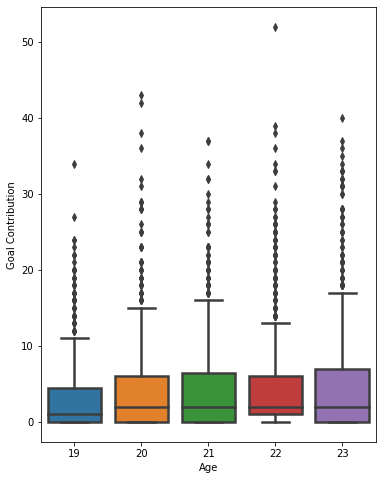

In [22]:
plt.subplots(figsize=(6,8))
sns.boxplot(x='Age', y='Goal Contribution', data= df , linewidth=2.5)

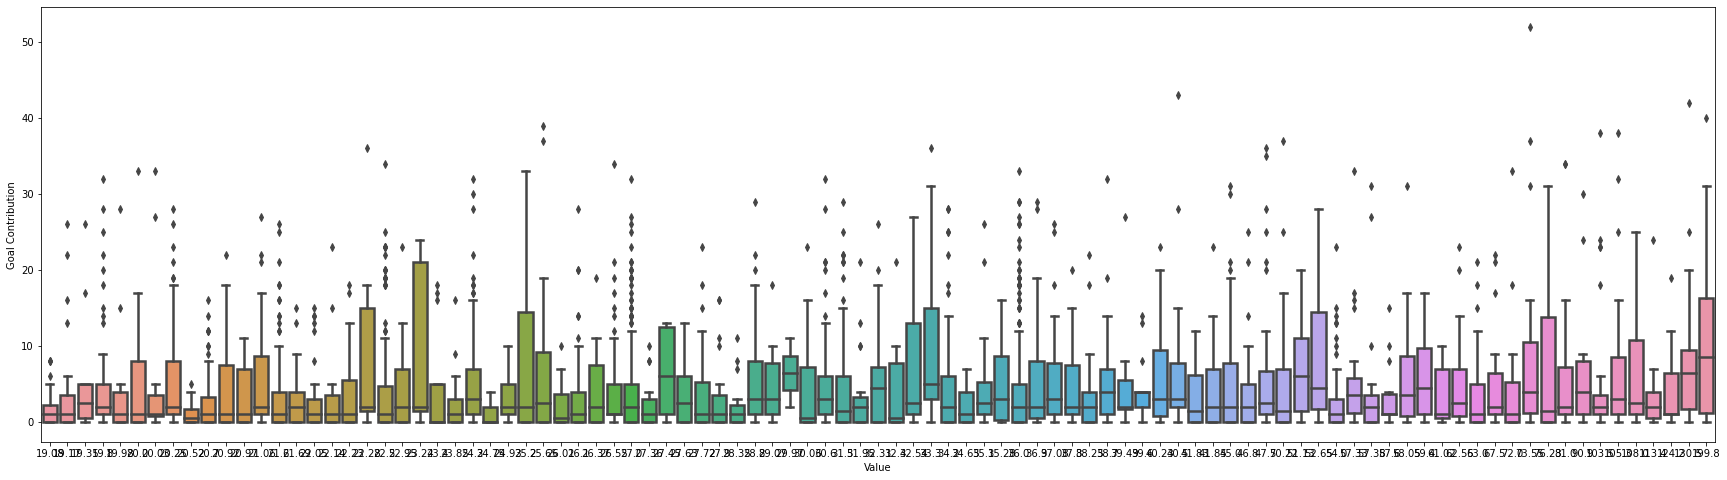

In [23]:
plt.subplots(figsize=(30,8))
sns.boxplot(x='Value', y='Goal Contribution', data= df , linewidth=2.5)

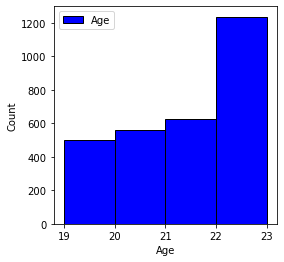

In [24]:
legend = ['Age']
plt.figure(figsize=(4, 4))
plt.hist(df['Age'], color=['blue'], bins=4, ec='black')
plt.ylabel('Count')
plt.xlabel('Age')
plt.legend(legend)
plt.show()


In [25]:
df.Age.describe()

count    2917.000000
mean       21.095303
std         1.381028
min        19.000000
25%        20.000000
50%        21.000000
75%        22.000000
max        23.000000
Name: Age, dtype: float64

,Goals,Assists,Age,Value,Goal Contribution,Yellow Cards,Double Yellow,Red Card
Goals,1.000000,0.602850,0.094768,0.076793,0.953706,0.617272,0.190759,0.165989
Assists,0.602850,1.000000,0.057340,0.148304,0.814888,0.518796,0.133223,0.099871
Age,0.094768,0.057340,1.000000,-0.044823,0.090460,0.026317,0.031411,-0.009958
Value,0.076793,0.148304,-0.044823,1.000000,0.111688,0.071699,0.028530,0.011854
Goal Contribution,0.953706,0.814888,0.090460,0.111688,1.000000,0.643982,0.188798,0.158231
Yellow Cards,0.617272,0.518796,0.026317,0.071699,0.643982,1.000000,0.229534,0.221772
Double Yellow,0.190759,0.133223,0.031411,0.028530,0.188798,0.229534,1.000000,0.043760
Red Card,0.165989,0.099871,-0.009958,0.011854,0.158231,0.221772,0.043760,1.000000


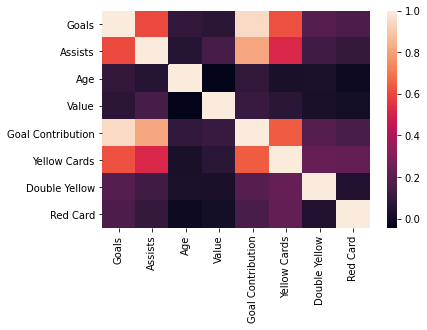

In [26]:
data = df[['Goals', 'Assists', 'Age', 'Minutes', 'Value', 'Goal Contribution', 'Yellow Cards', 'Double Yellow', 'Red Card']]
corr = data.corr()

#sns.heatmap(df.corr(['Goals', 'Assists']), cmap='RdYlGn')

sns.heatmap(corr)
corr